# Resultados de Laboratorio

1. Importar resultados. Preparación de data.
2. Definir una función para representar los resultados en gráficas.
3. Presentar los resultados.

In [19]:
import os
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

Datasets:


## Importar resultados

In [6]:
def import_file(basePath, filename):
    file = basePath + '/' + filename

    data_import = {}
    with open(file) as json_file:
        data_import = json.load(json_file)

    return data_import

def read_files(basePath='../lab/results'):
    files = []

    for f in os.listdir(basePath):
        if os.path.isfile(os.path.join(basePath, f)) and f.endswith(".json"):
            files.append(f)

    data_all = {}
    data_to_plot = {}

    for filename in files:
        data_import = import_file(basePath, filename)

        for data_each_one in data_import:
            num_nodes = str(data_each_one['nodes'])
            type_incremental = data_each_one['type']
            algorithm = data_each_one['algorithm']

            if num_nodes not in data_all:
                data_to_plot[num_nodes] = {}
                data_all[num_nodes] = {}

            if type_incremental not in data_all[num_nodes]:
                data_to_plot[num_nodes][type_incremental] = {}
                data_all[num_nodes][type_incremental] = []

            if algorithm not in data_to_plot[num_nodes][type_incremental]:
                data_to_plot[num_nodes][type_incremental][algorithm] = {
                    'edges': [], #data_each_one['edges'],
                    'time': [], #data_each_one['mean_times']
                    'stdev': [], #data_each_one['stdev_times']
                }

            data_all[num_nodes][type_incremental].append(data_each_one)
            data_to_plot[num_nodes][type_incremental][algorithm]['edges'].append(data_each_one['edges'])
            data_to_plot[num_nodes][type_incremental][algorithm]['time'].append(data_each_one['mean_times'])
            data_to_plot[num_nodes][type_incremental][algorithm]['stdev'].append(data_each_one['stdev_times'])
    
    return data_to_plot

## Definir script para gráficas

In [58]:


def draw_plot_bar(data_to_plot, nodes, type_incremental, algoritms=[], subplot=111):
    
    datas_for_algorithm = {
        'rr-bfs-truncated': 'o-g',
        'even-gazit': 'o-b',
        'abm': 'o-r',
        'quinca': 'o-k',
        'forest': 'o-c'
    }
        
    algoritmhs_to_calc = list(data_to_plot[nodes][type_incremental].keys()) if not algoritms else algoritms
    
    plt.subplot(subplot)
    for algorithm in algoritmhs_to_calc:
        al_values = data_to_plot[nodes][type_incremental][algorithm]
        x, y = zip(*sorted(zip(al_values['edges'], al_values['time'])))

        y = list(map(lambda w: w * 1000, y))

        plt.plot(x, y, datas_for_algorithm[algorithm], label=algorithm) 
    
    plt.legend(loc="upper left")
    plt.ylabel('Times')
    plt.xlabel('Edges number')

def return_data_frame(data):
    data_result_table = {}
    for algorithm, values in data.items():
        data_result_table[algorithm] = {}
        
        edges, times, stdev = zip(*sorted(zip(values['edges'], values['time'], values['stdev'])))
        for i in range(len(edges)):
            data_result_table[algorithm][edges[i]] = {}
         
            
            data_result_table[algorithm][edges[i]] = str(times[i]) + "      " + str(stdev[i])
            #aa = pd.DataFrame([{'time': times[i], 'stdev': stdev[i]}])
            #data_result_table[algorithm][edges[i]] = aa
            
            #data_result_table[algorithm][edges[i]]['time'] = times[i]
            #data_result_table[algorithm][edges[i]]['stdev'] = stdev[i]
    
    return pd.DataFrame(data_result_table)

def sort_algorithm_faster(data):
    data_result_faster = {}
    for algorithm, values in data.items():
        times = sorted(values['time'])
        data_result_faster[algorithm] = statistics.mean(times)
        
    return [k for k, v in sorted(data_result_faster.items(), key=lambda item: item[1])][:3]

def draw_bar_from_nodes(data_to_plot, num_nodes='100', just_faster=False):
    
    for type_incremental, data_values in data_to_plot[num_nodes].items():
        if just_faster:
            al_fasters = sort_algorithm_faster(data_to_plot[num_nodes][type_incremental])
            draw_plot_bar(data_to_plot, num_nodes, type_incremental, algoritms=al_fasters)
        else:
            draw_plot_bar(data_to_plot, num_nodes, type_incremental)
        print('Nodes: ' + num_nodes)
        print('Type Incremental: ' + type_incremental)
        plt.show()

# *RESULTADOS*

Load file from folder:

In [25]:
data_to_plot = read_files()

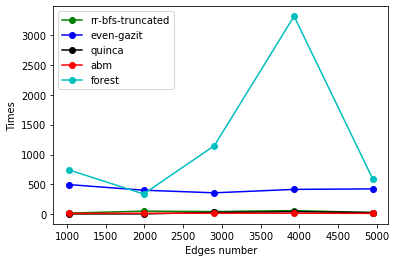

In [54]:
draw_plot_bar(data_to_plot, '100', 'decrease_edge')

Nodes: 100
Type Incremental: decrease_edge


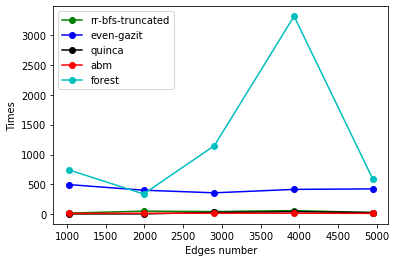

Nodes: 100
Type Incremental: insert_worst_edge


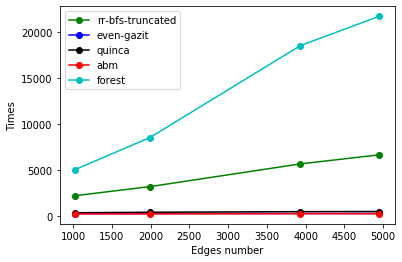

Nodes: 100
Type Incremental: insert_edge


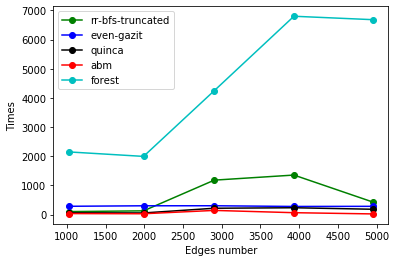

Nodes: 100
Type Incremental: decrease_worst_edge


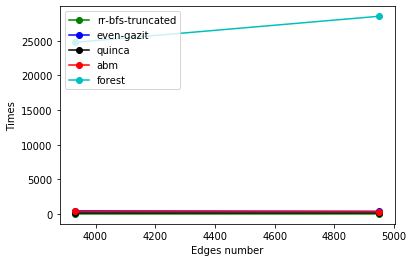

In [59]:
draw_bar_from_nodes(data_to_plot, '100')

Nodes: 100
Type Incremental: decrease_edge


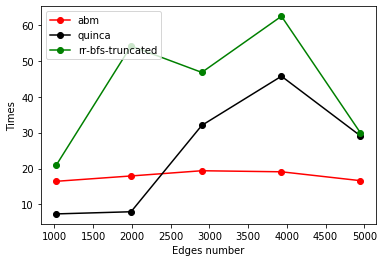

Nodes: 100
Type Incremental: insert_worst_edge


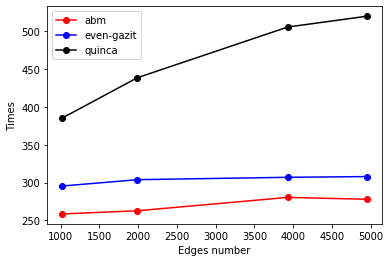

Nodes: 100
Type Incremental: insert_edge


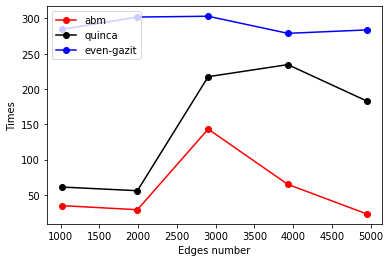

Nodes: 100
Type Incremental: decrease_worst_edge


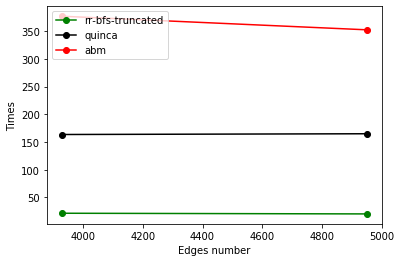

In [60]:
draw_bar_from_nodes(data_to_plot, '100', just_faster=True)

Nodes: 1000
Type Incremental: insert_worst_edge


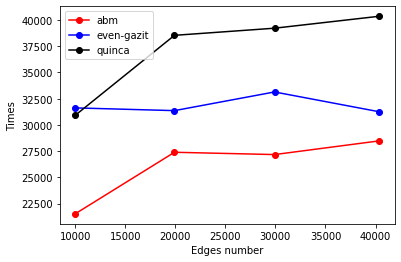

Nodes: 1000
Type Incremental: insert_edge


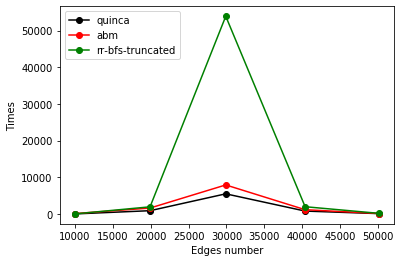

Nodes: 1000
Type Incremental: decrease_edge


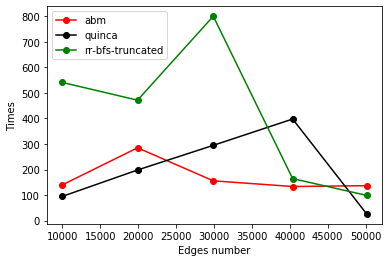

Nodes: 1000
Type Incremental: decrease_worst_edge


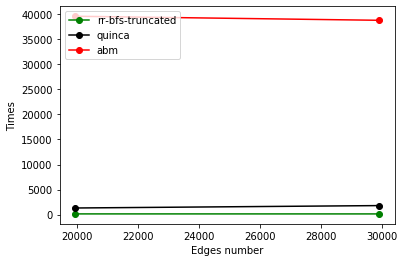

In [61]:
draw_bar_from_nodes(data_to_plot, '1000', just_faster=True)

Nodes: 2000
Type Incremental: decrease_edge


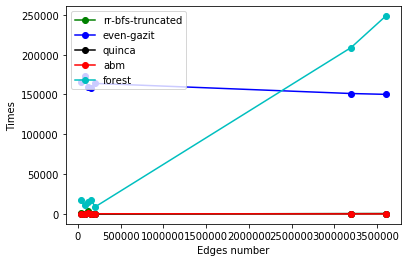

Nodes: 2000
Type Incremental: insert_worst_edge


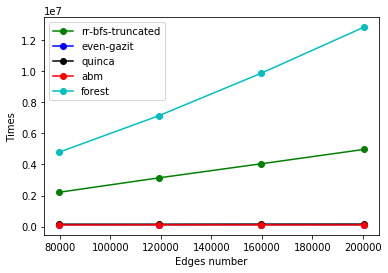

Nodes: 2000
Type Incremental: decrease_worst_edge


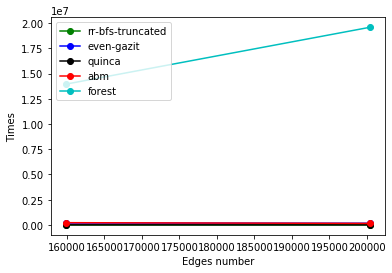

Nodes: 2000
Type Incremental: insert_edge


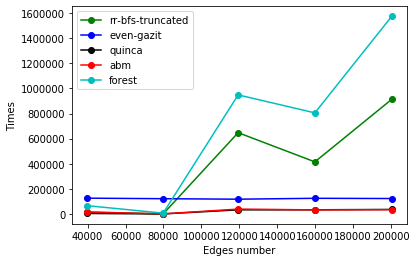

In [48]:
draw_bar_from_nodes(data_to_plot, '2000')

In [ ]:
draw_bar_from_nodes(data_to_plot, '5000')